# Лабораторная 2. Нечёткие системы

Purchase Evaluation: 48.36839605509449


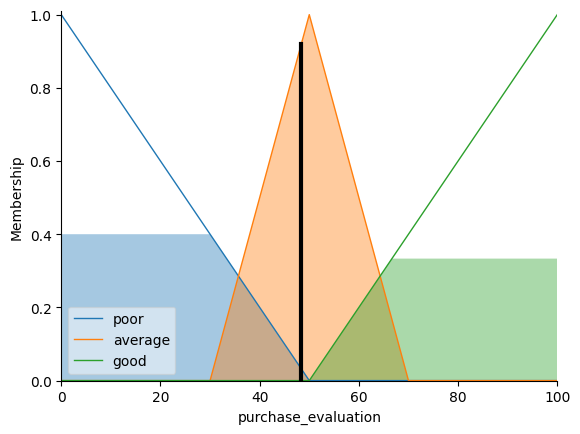

In [51]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Определение лингвистических переменных
price = ctrl.Antecedent(np.arange(0, 10_001, 1), 'price')
quality = ctrl.Antecedent(np.arange(1, 11, 1), 'quality')
purchase_volume = ctrl.Antecedent(np.arange(1, 1001, 1), 'purchase_volume')

purchase_grade = ctrl.Consequent(np.arange(0, 101, 1), 'purchase_grade')

# Определение нечетких множеств и их функций принадлежности
price['low'] = fuzz.trimf(price.universe, [0, 0, 5000])
price['medium'] = fuzz.trimf(price.universe, [3000, 5000, 7000])
price['high'] = fuzz.trimf(price.universe, [5000, 10000, 10000])

quality['low'] = fuzz.trimf(quality.universe, [1, 1, 5])
quality['medium'] = fuzz.trimf(quality.universe, [4, 6, 8])
quality['high'] = fuzz.trimf(quality.universe, [7, 10, 10])

purchase_volume['low'] = fuzz.trimf(purchase_volume.universe, [1, 1, 500])
purchase_volume['medium'] = fuzz.trimf(purchase_volume.universe, [300, 500, 700])
purchase_volume['high'] = fuzz.trimf(purchase_volume.universe, [500, 1000, 1000])

purchase_grade['poor'] = fuzz.trimf(purchase_grade.universe, [0, 0, 50])
purchase_grade['average'] = fuzz.trimf(purchase_grade.universe, [30, 50, 70])
purchase_grade['good'] = fuzz.trimf(purchase_grade.universe, [50, 100, 100])

# Определение правил
rule1 = ctrl.Rule(price['high'] | quality['low'] | purchase_volume['low'], purchase_grade['poor'])
rule2 = ctrl.Rule(price['medium'] | quality['medium'] | purchase_volume['medium'], purchase_grade['average'])
rule3 = ctrl.Rule(price['low'] | quality['high'] | purchase_volume['high'], purchase_grade['good'])
# можно определить ещё комбинации различные

# Строим систему управления
system = ctrl.ControlSystem([rule1, rule2, rule3])
purchase_grade_ctrl = ctrl.ControlSystemSimulation(system)

# Задаем значения входных переменных
purchase_grade_ctrl.input['price'] = 7000
purchase_grade_ctrl.input['quality'] = 8
purchase_grade_ctrl.input['purchase_volume'] = 500

# Выполняем нечеткий вывод
purchase_grade_ctrl.compute()

# Выводим результат
print("Purchase Evaluation:", purchase_grade_ctrl.output['purchase_grade'])

# Визуализация нечеткого вывода
purchase_grade.view(sim=purchase_grade_ctrl)
plt.show()

1. Что такое базис нечётких правил? 
Набор основных логических правил, которые описывают нечеткую систему управления.  

2. В чём состоят основные особенности системы нечёткой логики с фазификатором и дефазификатором? 
- Использование нечетких правил в форме "если-то" для описания поведения системы.
- Существование базы знаний, определяющей, как система реагирует на различные комбинации входных значений.
- Агрегация и вывод, где результаты нечетких правил комбинируются для формирования общего вывода системы.
3. Чем различаются логический вывод Мамдани и Сугено?  
База  знаний  Сугено  аналогична  базе  знаний  Мамдани  за  исключением  заключений правил, которые задаются не нечёткими термами, а линейной функцией от входов  

4. Как отразить обратную зависимость между входными и выходной переменными при построении системы нечёткого вывода вручную?  
Сформулировать правила с термами, отражающими обратную зависимость.  
    Например: "Если X большое, то Y маленькое."  